In [1]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [2]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [3]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [4]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [5]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [6]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

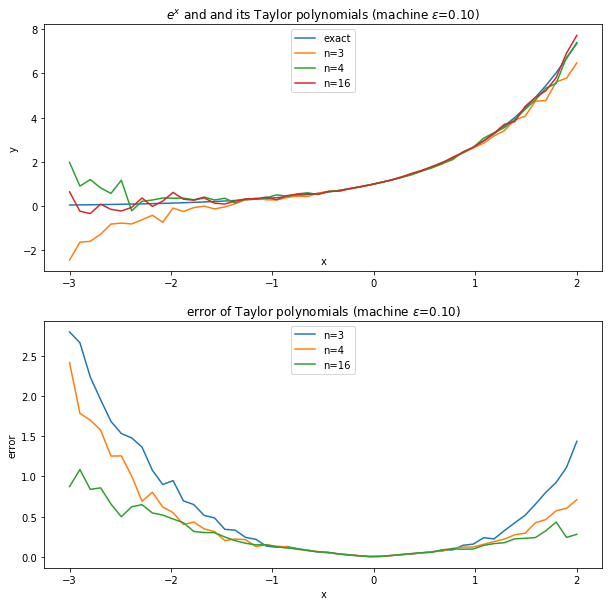

In [7]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

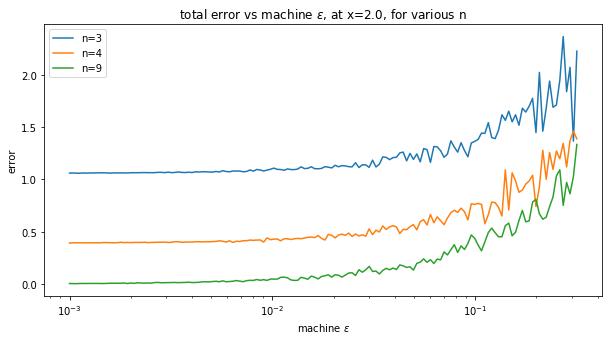

In [8]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

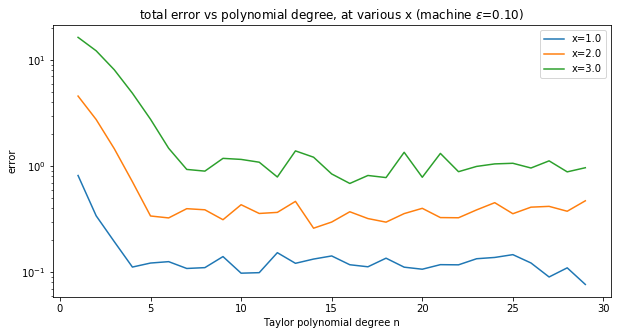

In [9]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

# Problem 1. The thresholds of absolute error vs $n$


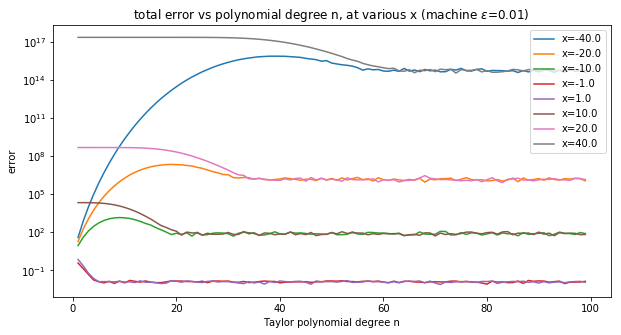

In [10]:
xlist = [-40, -20, -10, -1, 1, 10, 20, 40]
nlist=range(1,100)
eps=.01
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree n, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

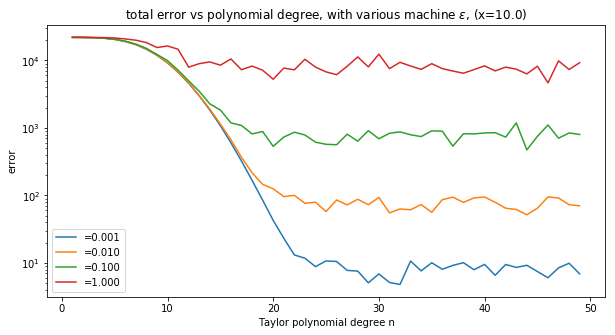

In [11]:
elist = [0.001, 0.01, 0.1, 1]
nlist=range(1,50)
kmax=20
x=10
plt.figure(figsize=(10,5))
for eps in elist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='=%.3f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, with various machine $\varepsilon$, (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

From the above two graphs, we see that the threshold at which increasing $n$ does not significantly change the absolute error depends on both $\varepsilon$ and $x$. 

Looking at the first graph, in relation to $x$, we observe that the error for big enough $n$ only depends on $|x|$. Moreover, the greater $|x|$, the longer it takes (higher $n$ values) to reach this threshold. We also note that for small $n$, there is a significant difference in the error proportional to $|x|$ between the positive and negative $x$ of same magnitude.

Now, considering the second graph, we see that the threshold is inversely proportional to $\varepsilon$, as greater $\varepsilon$ reach the threshold earlier. 

# Problem 2. The relative error of $e^x$
Below are simplie modifications made to the error function in order to study the relative error.


In [12]:
def rerrxlist(n,xlist,eps):
#difference between Tn(x) and e^x, divided by e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [13]:
def rerrelist(n,x,elist):
#difference between Tn(x) and e^x, divided by e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

In [14]:
def rerrnlist(nlist,x,eps):
#difference between Tn(x) and e^x, divided by e^x

#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append((expser(n,x,eps)-np.exp(x))/(np.exp(x)))
    return yy

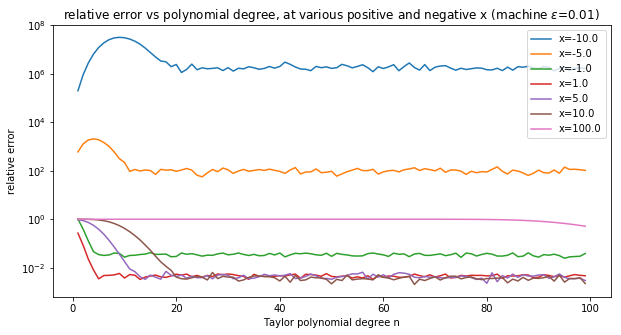

In [15]:
xlist = [-10, -5, -1, 1, 5, 10, 100]
nlist=range(1,100)
eps=.01
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various positive and negative x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

The first obvious obervation to make is that the relative error is drasticly greater when we have negative $x$ values. This is due to the fact that even if the absolute error is small, we are dividing by an even smaller number, e.g. $e^{-10}$. To better understand the behaviour of both positive and negative $x$, we oberve each case individually below.

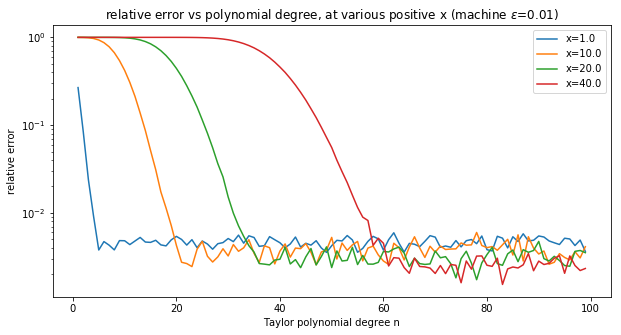

In [16]:
xlist = [1, 10, 20, 40]
nlist=range(1,100)
eps=.01
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various positive x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

We see that the threshold at which $n$ does not affect the relative error increases with $|x|$. Moreover, the greater the $x$, there seems to be somewhat smaller relative error for large enough $x$. One can see this by comparing the red to the blue curve, for example. However, this difference may not be that significant since the relative error is always between 0.05 and 0.1.

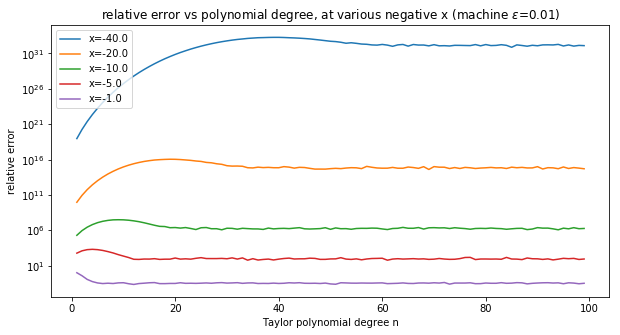

In [17]:
xlist = [-40, -20, -10, -5, -1]
nlist=range(1,100)
eps=.01
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, at various negative x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

Again, we see that the threshold at which $n$ does not affect the relative error increases with $|x|$. However, in contrast with the positive $x$ values, the relative errors here grow exponentially, which is to be expected because of what was discussed two paragraphs above. 

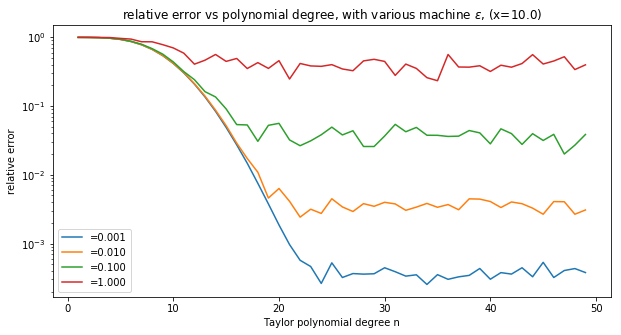

In [18]:
elist = [0.001, 0.01, 0.1, 1]
nlist=range(1,50)
kmax=20
x=10
plt.figure(figsize=(10,5))
for eps in elist:
    y=np.abs(rerrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(rerrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='=%.3f'%eps)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'relative error vs polynomial degree, with various machine $\varepsilon$, (x=%.1f)'%x)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('relative error')
plt.legend()
plt.show()

We observe the striking similarity of this graph and the one plotting absolute error, keeping in mind the logarithmic y-axis. 

# Problem 3. The cosine function
We now study the effect of inexact arithmetic on computation of the cosine series

$$
\cos x = 1 - \frac{x^2}2 + \frac{x^4}{4!} - \frac{x^6}{6!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 - \frac{x^2}2 + \frac{x^4}{4!} - \ldots + \frac{(-1)^nx^{2n}}{(2n)!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.

In this setting, the built-in computation of $\cos x$ can be taken as exact.


* $\texttt{coser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [19]:
def coser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for cosx
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(((-1)**i)*x**2)/(2*i*(2*i-1))
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [26]:
def coserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(coser(n,x,eps))
    return ylist

In [28]:
def cerrxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

In [29]:
def cerrelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

In [30]:
def cerrnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(coser(n,x,eps)-np.cos(x))
    return yy

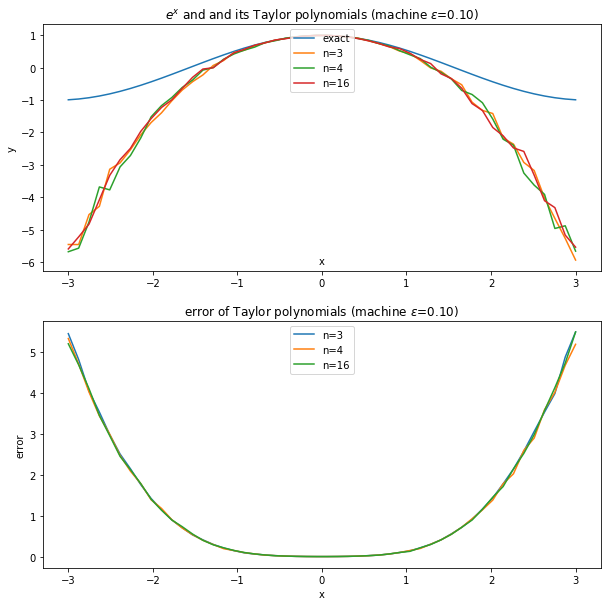

In [35]:
xlist = np.linspace(-3, 3, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.cos(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,coserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(cerrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(cerrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

## 3.1. Absolute error of the cosine function